In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [138]:
pd.set_option('display.max_columns',None)

In [139]:
data=pd.read_csv("Video Streaming Platform Analysis.csv")

In [140]:
duplicate=data[data.duplicated()]
duplicate

,Timestamp,1. Do you use Video Streaming Platform?,2. How frequently you watch or stream online platforms ?,3. Which of the following Video Streaming Platform do you currently use?,4. What do you watch the most on video streaming platform?,5. Which type of web series or movies do you prefer most?,6. Have you watch or familiar with these original web series of Netflix.,7. Have you watch or familiar with these original web series of Amazon Prime.,8. Have you watch or familiar with these original web series of Hotstar.,9. Have you watch or familiar with these original web series of Hulu.,10. What is your age?,11. From where did you get the idea of these web series.,12. On what basis you frequently choose your movies or web series.,13. How long you are using these video streaming platforms.,14. Choose the features which you think is essential on your streaming platforms.,15. How was your overall experience of video streaming platforms according to original web series.,16. Would you like to give any suggestion for the improvement.
152,3/22/2021 11:38,Yes,Daily,Prime,"Original web series, Movies","Action, Drama, Comedy",13 Reasons Why,"Mirzapur, Tandav",None of the above,Helstorm,18-30,Social Media,Story,Between 1 and 2 years,Recommendation,Good,I want New stories


In [141]:
data=data.fillna(method='ffill')
data

,Timestamp,1. Do you use Video Streaming Platform?,2. How frequently you watch or stream online platforms ?,3. Which of the following Video Streaming Platform do you currently use?,4. What do you watch the most on video streaming platform?,5. Which type of web series or movies do you prefer most?,6. Have you watch or familiar with these original web series of Netflix.,7. Have you watch or familiar with these original web series of Amazon Prime.,8. Have you watch or familiar with these original web series of Hotstar.,9. Have you watch or familiar with these original web series of Hulu.,10. What is your age?,11. From where did you get the idea of these web series.,12. On what basis you frequently choose your movies or web series.,13. How long you are using these video streaming platforms.,14. Choose the features which you think is essential on your streaming platforms.,15. How was your overall experience of video streaming platforms according to original web series.,16. Would you like to give any suggestion for the improvement.
0,3/1/2021 16:41,Yes,Once or twice in a week,"Netflix, Prime, Hotstar","Original web series, Others","Comedy, Others","Money Heist, Standup Comedy","Tandav, Standup Comedy , The Family man , Pa...",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Recommendation, Ease of use",Good,"Yes, faster next season."
1,3/1/2021 19:44,Yes,Monthly,"Netflix, Prime",Movies,"Action, Drama, Comedy",Money Heist,"Standup Comedy , The Family man , Panchayat.",None of the above,The Ultimate Playlist of Noise,18-30,"Family/Friends Recommendation, Social Media","Story, Director",Less than 1 year,"Search option, Recommendation",Excellent,No
2,3/1/2021 20:44,Yes,Daily,"Netflix, Prime, Hotstar, Hulu","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy, Horror","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya","Helstorm, Monsterland, Woke, The Ultimate Play...",18-30,"Family/Friends Recommendation, Television, Soc...",Story,Between 1 and 2 years,"Search option, Recommendation",Excellent,Nothing
3,3/1/2021 20:45,Yes,Daily,Hulu,"Movies, Sports and News",Action,"13 Reasons Why, The Witcher","Made in heaven, Tandav, Breath into the shadow","Hostages, Arya","Monsterland, None of the above",18-30,"Television, Social Media","Cast, Director",More than 2 years,Ease of use,Excellent,Nothing
4,3/2/2021 21:06,Yes,Daily,"Netflix, Prime, Hotstar, Zee5","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya,...",None of the above,18-30,"Family/Friends Recommendation, Television, Soc...","Cast, Story",More than 2 years,"Recommendation, Ease of use",Excellent,Need more web series like Money Heist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4/12/2021 23:13,Yes,Daily,Prime,"Original web series, Documentaries","Drama, Comedy",None of the above,"Made in heaven, Tandav",None of the above,None of the above,31-50,"Social Media, Ads on OTT platforms","Cast, Story, Director",Between 1 and 2 years,"Search option, Recommendation",Excellent,No need
237,4/12/2021 23:15,Yes,Daily,"Netflix, Prime","Original web series, Movies, Documentaries","Action, Drama, Comedy, Horror, Others","13 Reasons Why, The Witcher, Money Heist","Mirzapur, Tandav",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Search option, Recommendation",Good,yes need to decrease the membership amount
238,2021/04/28 8:55:16 AM GMT+5:30,Yes,Daily,Prime,Original web series,"Action, Comedy",None of the above,"Mirzapur, Tandav",None of the above,None of the above,18-30,Social Media,Cast,Between 1 and 2 years,Search option;Recomme

In [142]:
data.columns

Index(['Timestamp', '1.  Do you use Video Streaming Platform?',
       '2. How frequently you watch or stream online platforms ?',
       '3. Which of the following Video Streaming Platform do you currently use?',
       '4. What do you watch the most on video streaming platform? ',
       '5. Which type of web series or movies do you prefer most?',
       '6.  Have you watch or familiar with these original web series of Netflix.',
       '7. Have you watch or familiar with these original web series of Amazon  Prime.',
       '8. Have you watch or familiar with these original web series of Hotstar.',
       '9. Have you watch or familiar with these original web series of Hulu.',
       '10. What is your age?',
       '11. From where did you get the idea of these web series.',
       '12. On what basis you frequently choose your movies or web series.',
       '13. How long you are using these video streaming platforms.',
       '14. Choose the features which you think is essential on yo

In [207]:
    data.rename(columns ={'1.  Do you use Video Streaming Platform?':'Video Streaming Platform(Y/N)', '2. How frequently you watch or stream online platforms ?':'Frequency of VSPA',
                           '3. Which of the following Video Streaming Platform do you currently use?':'Currently Used VSPA',
                           '4. What do you watch the most on video streaming platform? ':'Types',
                           '5. Which type of web series or movies do you prefer most?':'Genres',
                           '6.  Have you watch or familiar with these original web series of Netflix.':'Netflix Original Series',
                           '7. Have you watch or familiar with these original web series of Amazon  Prime.':'Prime Original Series',
                           '8. Have you watch or familiar with these original web series of Hotstar.':'Hotstar Original Series',
                            '9. Have you watch or familiar with these original web series of Hulu.':'Hulu Original Series',
                            '10. What is your age?':'Age',
                           '11. From where did you get the idea of these web series.':'advertisement',
                            '12. On what basis you frequently choose your movies or web series.':'Selection',
                           '13. How long you are using these video streaming platforms.':'Time Period',
                            '14. Choose the features which you think is essential on your streaming platforms.':'Features',
                            '15. How was your overall experience of video streaming platforms according to original web series.':'Overall Rating',
                            '16. Would you like to give any suggestion for the improvement.':'Suggestion'},inplace=True
                )

In [208]:
data.columns

Index(['Timestamp', 'Video Streaming Platform(Y/N)', 'Frequency of VSPA',
       'Currently Used VSPA', 'Types', 'Genres', 'Netflix Original Series',
       'Prime Original Series', 'Hotstar Original Series',
       'Hulu Original Series', 'Age', 'advertisement', 'Selection',
       'Time Period', 'Features', 'Overall Rating', 'Suggestion'],
      dtype='object')

In [209]:
data

,Timestamp,Video Streaming Platform(Y/N),Frequency of VSPA,Currently Used VSPA,Types,Genres,Netflix Original Series,Prime Original Series,Hotstar Original Series,Hulu Original Series,Age,advertisement,Selection,Time Period,Features,Overall Rating,Suggestion
0,3/1/2021 16:41,Yes,Once or twice in a week,"Netflix, Prime, Hotstar","Original web series, Others","Comedy, Others","Money Heist, Standup Comedy","Tandav, Standup Comedy , The Family man , Pa...",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Recommendation, Ease of use",2,"Yes, faster next season."
1,3/1/2021 19:44,Yes,Monthly,"Netflix, Prime",Movies,"Action, Drama, Comedy",Money Heist,"Standup Comedy , The Family man , Panchayat.",None of the above,The Ultimate Playlist of Noise,18-30,"Family/Friends Recommendation, Social Media","Story, Director",Less than 1 year,"Search option, Recommendation",1,No
2,3/1/2021 20:44,Yes,Daily,"Netflix, Prime, Hotstar, Hulu","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy, Horror","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya","Helstorm, Monsterland, Woke, The Ultimate Play...",18-30,"Family/Friends Recommendation, Television, Soc...",Story,Between 1 and 2 years,"Search option, Recommendation",1,Nothing
3,3/1/2021 20:45,Yes,Daily,Hulu,"Movies, Sports and News",Action,"13 Reasons Why, The Witcher","Made in heaven, Tandav, Breath into the shadow","Hostages, Arya","Monsterland, None of the above",18-30,"Television, Social Media","Cast, Director",More than 2 years,Ease of use,1,Nothing
4,3/2/2021 21:06,Yes,Daily,"Netflix, Prime, Hotstar, Zee5","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya,...",None of the above,18-30,"Family/Friends Recommendation, Television, Soc...","Cast, Story",More than 2 years,"Recommendation, Ease of use",1,Need more web series like Money Heist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4/12/2021 23:13,Yes,Daily,Prime,"Original web series, Documentaries","Drama, Comedy",None of the above,"Made in heaven, Tandav",None of the above,None of the above,31-50,"Social Media, Ads on OTT platforms","Cast, Story, Director",Between 1 and 2 years,"Search option, Recommendation",1,No need
237,4/12/2021 23:15,Yes,Daily,"Netflix, Prime","Original web series, Movies, Documentaries","Action, Drama, Comedy, Horror, Others","13 Reasons Why, The Witcher, Money Heist","Mirzapur, Tandav",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Search option, Recommendation",2,yes need to decrease the membership amount
238,2021/04/28 8:55:16 AM GMT+5:30,Yes,Daily,Prime,Original web series,"Action, Comedy",None of the above,"Mirzapur, Tandav",None of the above,None of the above,18-30,Social Media,Cast,Between 1 and 2 years,Search option;Recommendation,1,No
239,2021/04/28 2:40:46 PM GMT+5:30,Yes,Once or twice in a week,Prime,Original web series,"Action, Drama, Comedy",None of the above,"Mirzapur, Made in heaven",None of the above,None of the above,18-30,Family/Friends Recommendation;Social Media,Cast;Story,Less than 1 year,Search option;Recommendation,2,No need


In [146]:
data['Video Streaming Platform(Y/N)'].value_counts()

Yes    240
No       1
Name: Video Streaming Platform(Y/N), dtype: int64

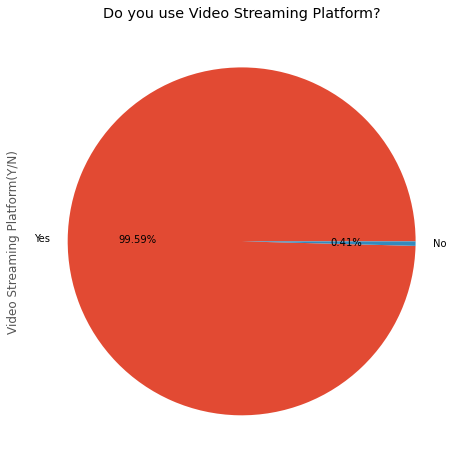

In [147]:
data['Video Streaming Platform(Y/N)'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,8))
plt.title("Do you use Video Streaming Platform?")
plt.show()

In [148]:
data['Frequency of VSPA'].value_counts()

Daily                      159
Once or twice in a week     67
Monthly                     15
Name: Frequency of VSPA, dtype: int64

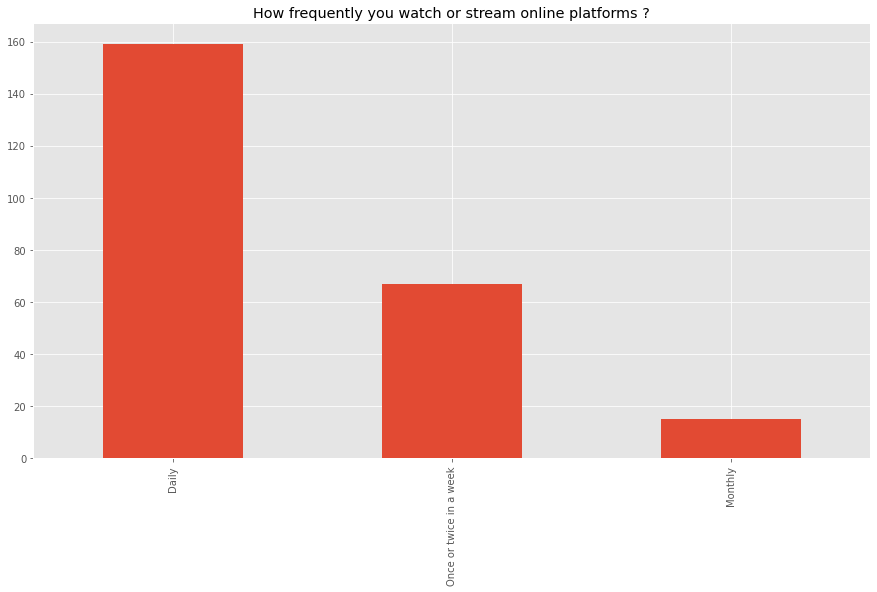

In [149]:
data['Frequency of VSPA'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title("How frequently you watch or stream online platforms ?")
plt.show()

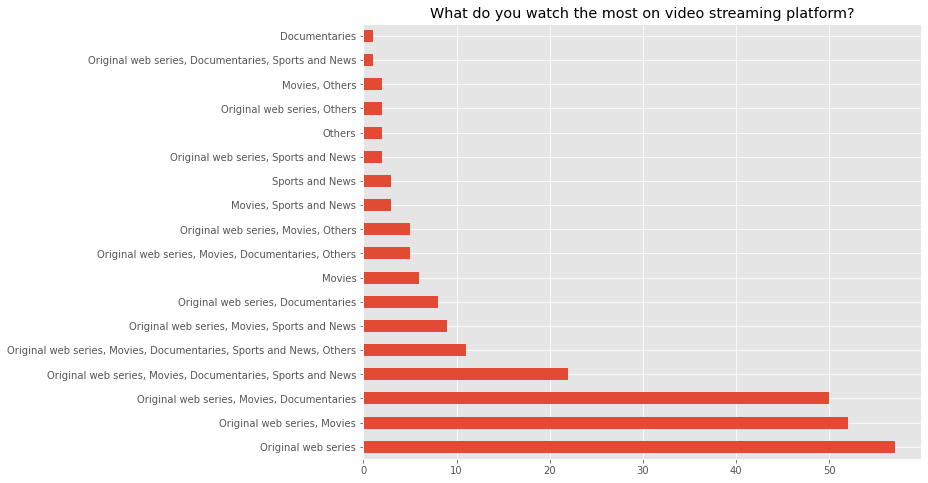

In [150]:
data['Types'].value_counts().plot(kind='barh',figsize=(10,8))
plt.title("What do you watch the most on video streaming platform?")
plt.show()

In [151]:
data['Currently Used VSPA'].value_counts()

Prime                                                   52
Hotstar                                                 43
Netflix, Prime, Hotstar                                 31
Prime, Hotstar                                          28
Netflix                                                 26
Netflix, Prime                                          24
Netflix, Hotstar                                        23
Netflix, Prime, Hotstar, Hulu                            2
Youtube                                                  2
Netflix, Prime, Hotstar, Zee5                            2
Netflix, Prime, Hotstar, Zee5 , youtube                  1
Prime, Youtube                                           1
Hulu                                                     1
Netflix, Hotstar, Zee5,voot                              1
Netflix, Prime, Hotstar, Hulu, Thop tv, telegram etc     1
Hotstar, Zee5                                            1
Prime, Zee5                                             

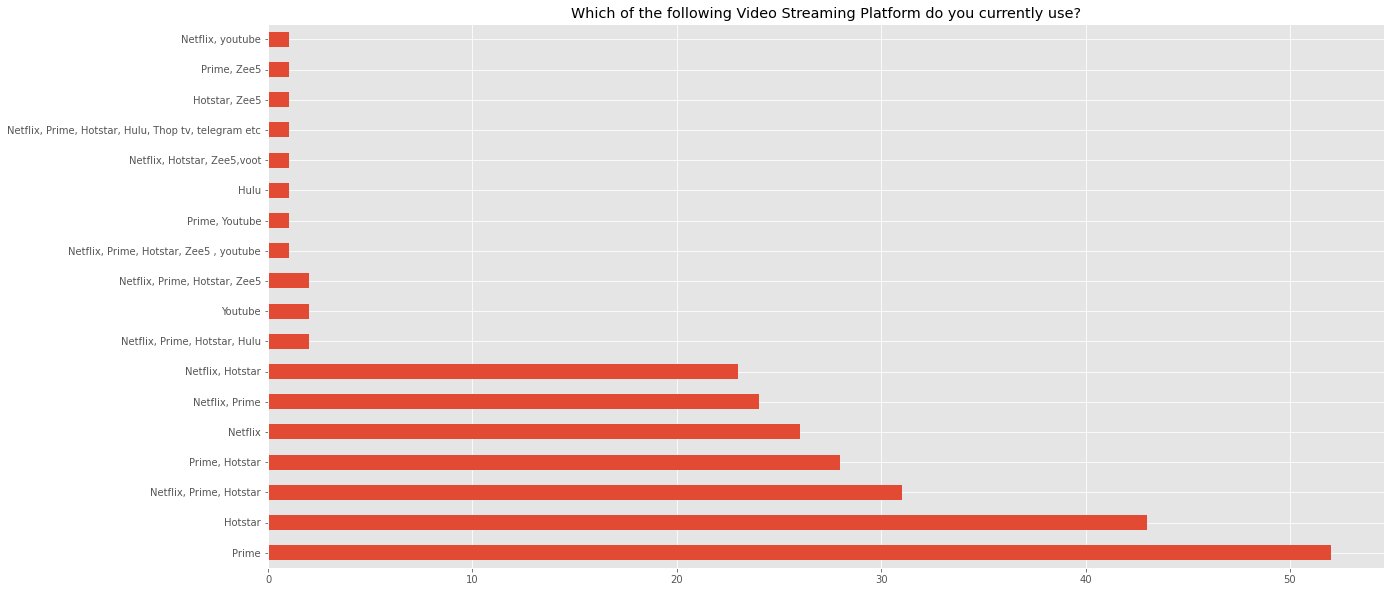

In [152]:
data['Currently Used VSPA'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title("Which of the following Video Streaming Platform do you currently use?")
plt.show()

In [153]:
data['Genres'].value_counts()

Action, Drama, Comedy                    75
Action, Drama, Comedy, Horror, Others    36
Action, Drama, Comedy, Horror            26
Action, Drama, Comedy, Others            17
Action, Drama                            12
Action                                   11
Action, Comedy                            9
Action, Comedy, Horror                    8
Drama, Comedy                             7
Action, Horror                            5
Comedy                                    5
Comedy, Horror                            4
Horror                                    4
Action, Drama, Horror                     3
Drama, Comedy, Horror                     3
Others                                    3
Comedy, Others                            2
Drama                                     2
Action,Drama                              2
Comedy, Horror, Others                    1
Drama, Comedy, Others                     1
Drama, Horror                             1
Action, Others                  

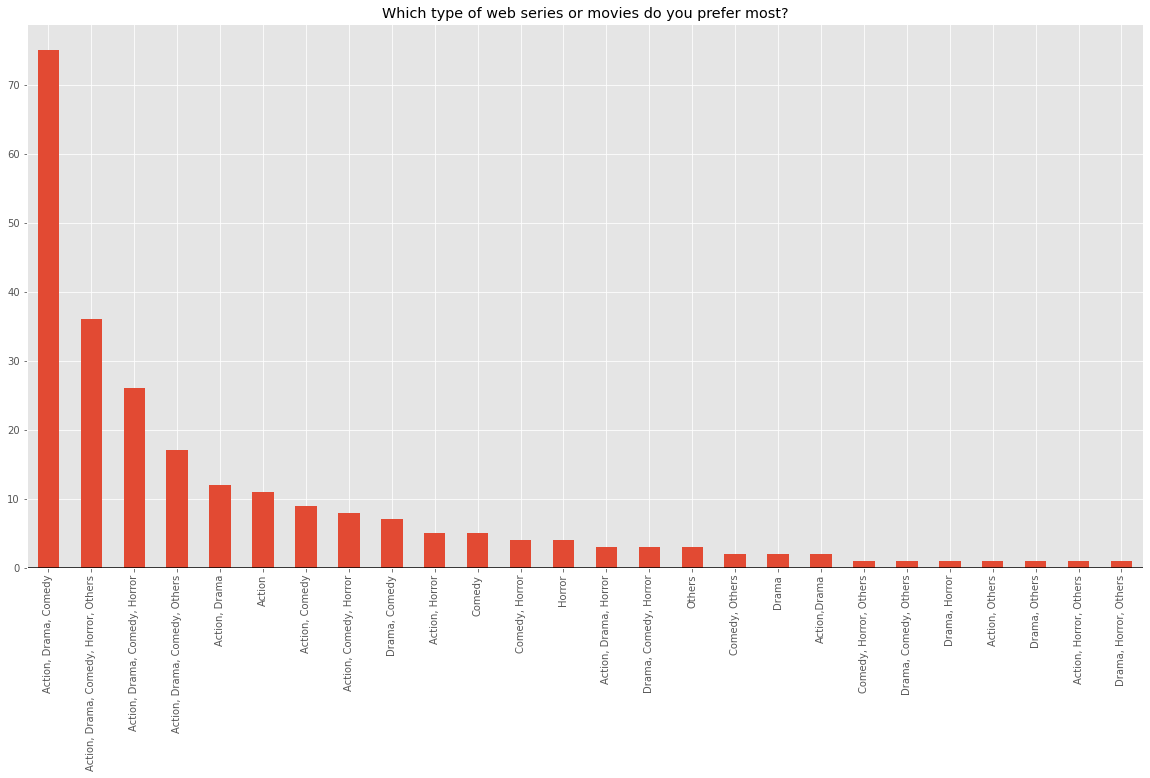

In [154]:
data['Genres'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("Which type of web series or movies do you prefer most?")
plt.axhline(0, color="k");

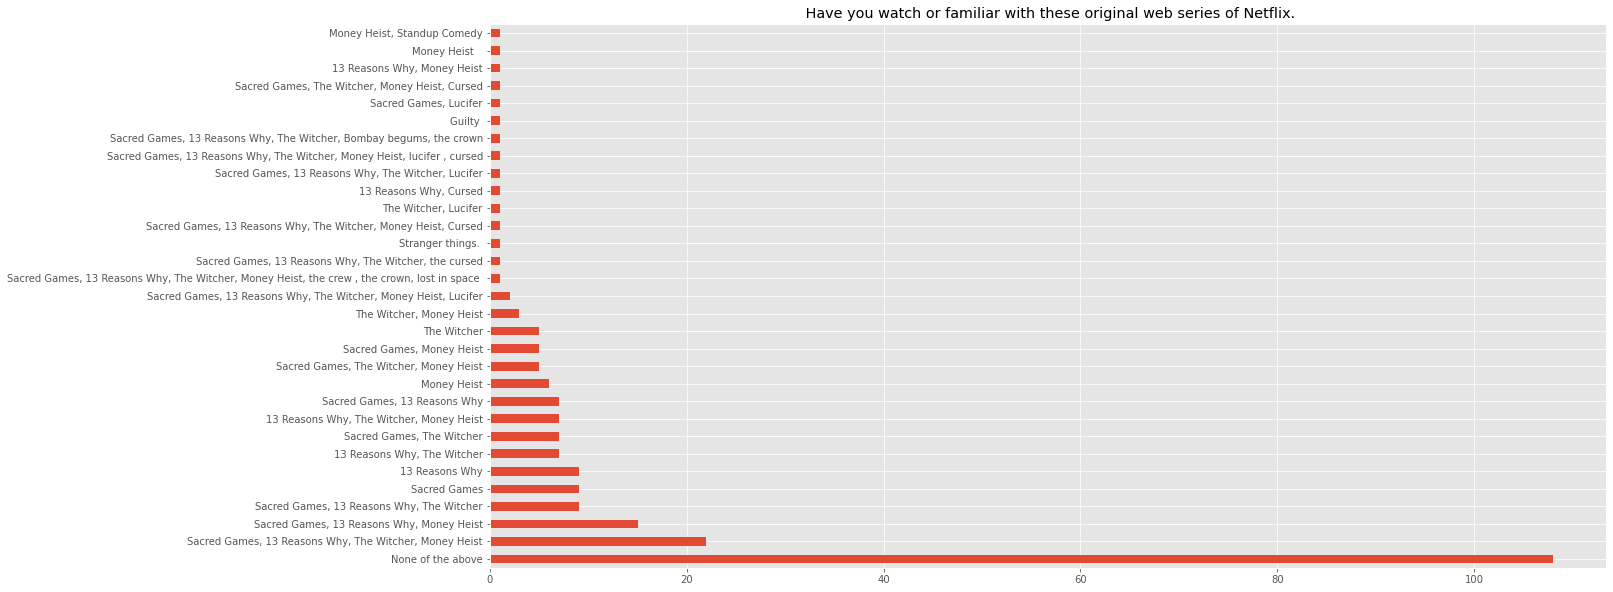

In [155]:
data['Netflix Original Series'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title(" Have you watch or familiar with these original web series of Netflix.")
plt.show()

In [156]:
data

,Timestamp,Video Streaming Platform(Y/N),Frequency of VSPA,Currently Used VSPA,Types,Genres,Netflix Original Series,Prime Original Series,Hotstar Original Series,Hulu Original Series,Age,advertisement,Selection,Time Period,Features,Overall Rating,Suggestion
0,3/1/2021 16:41,Yes,Once or twice in a week,"Netflix, Prime, Hotstar","Original web series, Others","Comedy, Others","Money Heist, Standup Comedy","Tandav, Standup Comedy , The Family man , Pa...",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Recommendation, Ease of use",Good,"Yes, faster next season."
1,3/1/2021 19:44,Yes,Monthly,"Netflix, Prime",Movies,"Action, Drama, Comedy",Money Heist,"Standup Comedy , The Family man , Panchayat.",None of the above,The Ultimate Playlist of Noise,18-30,"Family/Friends Recommendation, Social Media","Story, Director",Less than 1 year,"Search option, Recommendation",Excellent,No
2,3/1/2021 20:44,Yes,Daily,"Netflix, Prime, Hotstar, Hulu","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy, Horror","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya","Helstorm, Monsterland, Woke, The Ultimate Play...",18-30,"Family/Friends Recommendation, Television, Soc...",Story,Between 1 and 2 years,"Search option, Recommendation",Excellent,Nothing
3,3/1/2021 20:45,Yes,Daily,Hulu,"Movies, Sports and News",Action,"13 Reasons Why, The Witcher","Made in heaven, Tandav, Breath into the shadow","Hostages, Arya","Monsterland, None of the above",18-30,"Television, Social Media","Cast, Director",More than 2 years,Ease of use,Excellent,Nothing
4,3/2/2021 21:06,Yes,Daily,"Netflix, Prime, Hotstar, Zee5","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya,...",None of the above,18-30,"Family/Friends Recommendation, Television, Soc...","Cast, Story",More than 2 years,"Recommendation, Ease of use",Excellent,Need more web series like Money Heist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4/12/2021 23:13,Yes,Daily,Prime,"Original web series, Documentaries","Drama, Comedy",None of the above,"Made in heaven, Tandav",None of the above,None of the above,31-50,"Social Media, Ads on OTT platforms","Cast, Story, Director",Between 1 and 2 years,"Search option, Recommendation",Excellent,No need
237,4/12/2021 23:15,Yes,Daily,"Netflix, Prime","Original web series, Movies, Documentaries","Action, Drama, Comedy, Horror, Others","13 Reasons Why, The Witcher, Money Heist","Mirzapur, Tandav",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Search option, Recommendation",Good,yes need to decrease the membership amount
238,2021/04/28 8:55:16 AM GMT+5:30,Yes,Daily,Prime,Original web series,"Action, Comedy",None of the above,"Mirzapur, Tandav",None of the above,None of the above,18-30,Social Media,Cast,Between 1 and 2 years,Search option;Recommendation,Excellent,No
239,2021/04/28 2:40:46 PM GMT+5:30,Yes,Once or twice in a week,Prime,Original web series,"Action, Drama, Comedy",None of the above,"Mirzapur, Made in heaven",None of the above,None of the above,18-30,Family/Friends Recommendation;Social Media,Cast;Story,Less than 1 year,Search option;Recommendation,Good,No need


In [157]:
data['Netflix Original Series'].value_counts()

None of the above                                                                               108
Sacred Games, 13 Reasons Why, The Witcher, Money Heist                                           22
Sacred Games, 13 Reasons Why, Money Heist                                                        15
Sacred Games, 13 Reasons Why, The Witcher                                                         9
Sacred Games                                                                                      9
13 Reasons Why                                                                                    9
13 Reasons Why, The Witcher                                                                       7
Sacred Games, The Witcher                                                                         7
13 Reasons Why, The Witcher, Money Heist                                                          7
Sacred Games, 13 Reasons Why                                                                      7


In [158]:
data['Prime Original Series'].value_counts()

None of the above                                                             52
Mirzapur                                                                      46
Mirzapur, Tandav                                                              41
Mirzapur, Made in heaven, Tandav                                              29
Mirzapur, Made in heaven, Tandav, Breath into the shadow                      16
Mirzapur, Made in heaven, Breath into the shadow                               9
Mirzapur, Made in heaven                                                       8
Made in heaven                                                                 5
Made in heaven, Tandav                                                         5
Mirzapur, Tandav, Breath into the shadow                                       5
Mirzapur, Breath into the shadow                                               4
Breath into the shadow                                                         3
Tandav                      

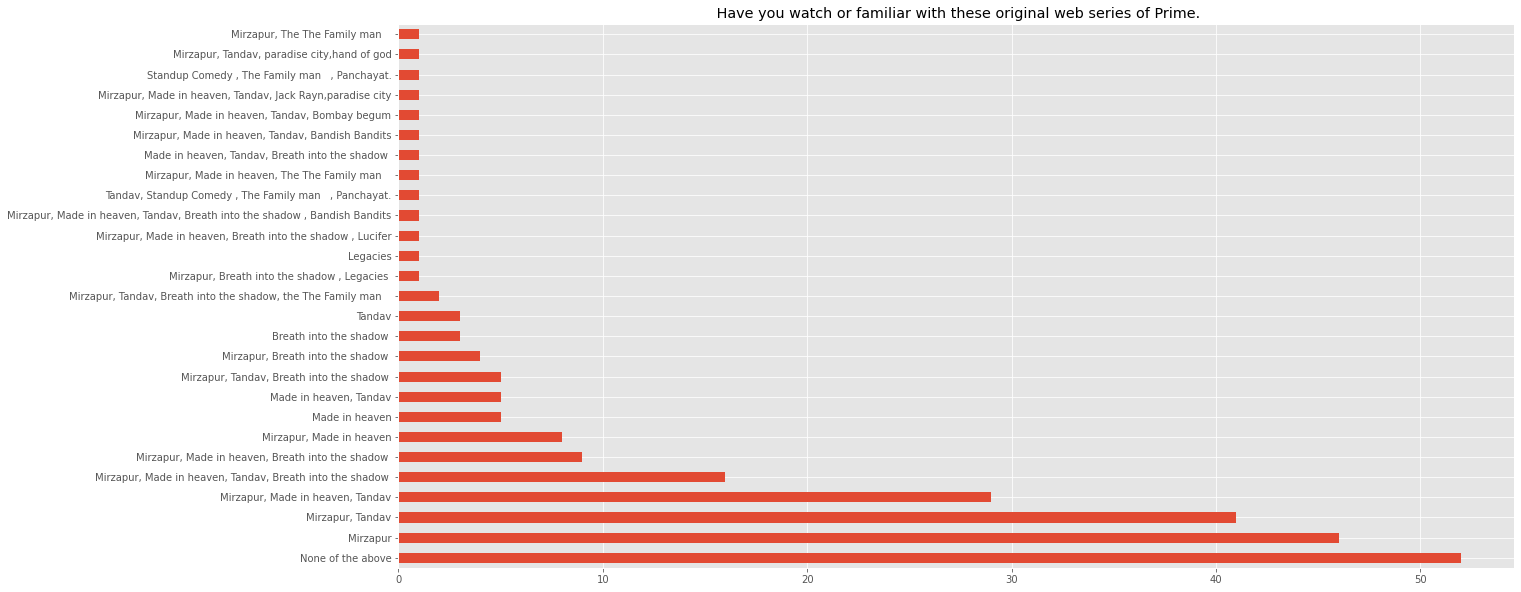

In [159]:
data['Prime Original Series'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title(" Have you watch or familiar with these original web series of Prime.")
plt.show()

In [160]:
data['Hotstar Original Series'].value_counts()

None of the above                                                         98
Special OPS, Hostages, Criminal Justice                                   22
Hostages, Arya                                                            18
Hostages, Criminal Justice                                                18
Special OPS, Hostages, Criminal Justice, Arya                             12
Hostages, Criminal Justice, Arya                                          11
Criminal Justice                                                           9
Special OPS, Hostages, Arya                                                9
Arya                                                                       7
Special OPS, Criminal Justice                                              7
Hostages                                                                   6
Special OPS                                                                5
Special OPS, Hostages, City of dreams                                      2

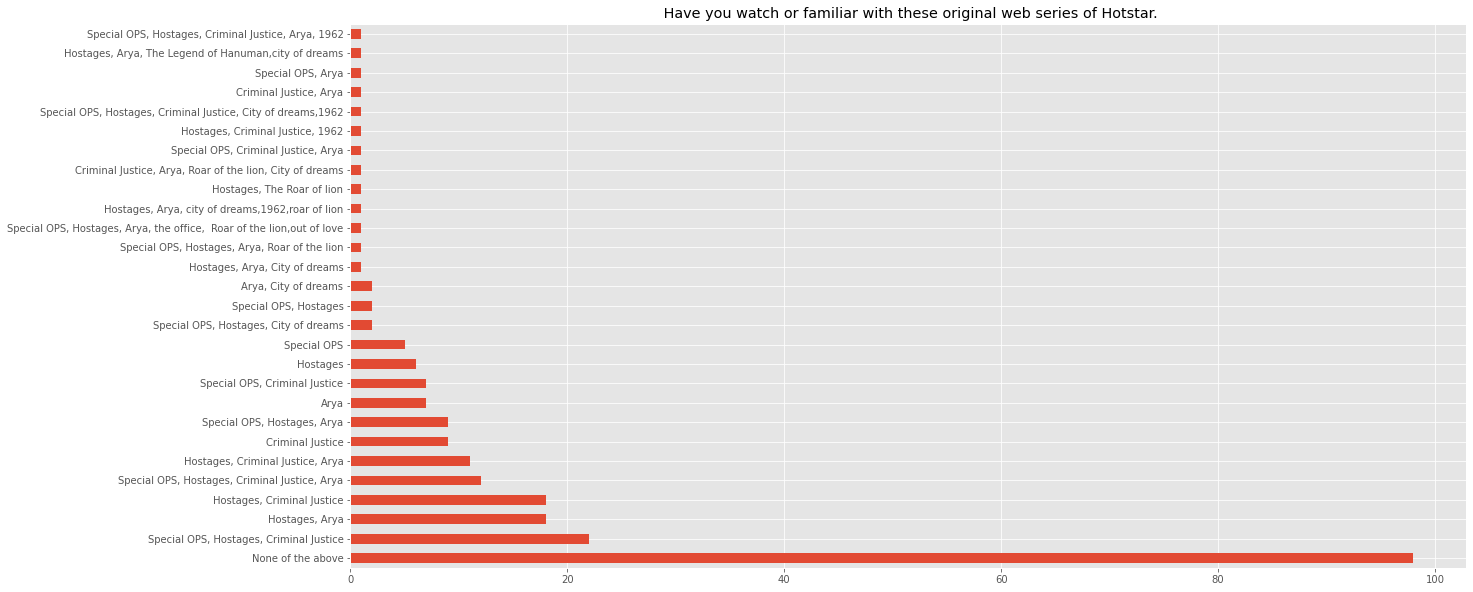

In [161]:
data['Hotstar Original Series'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title(" Have you watch or familiar with these original web series of Hotstar.")
plt.show()

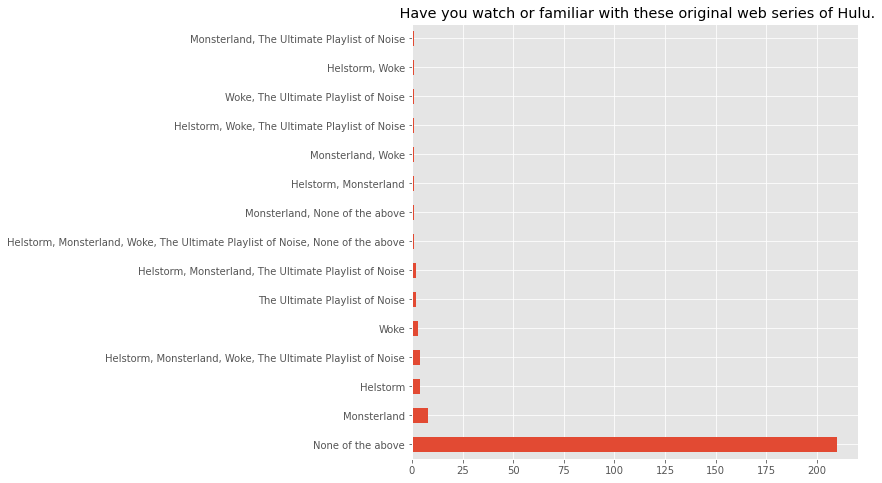

In [162]:
data['Hulu Original Series'].value_counts().plot(kind='barh',figsize=(8,8))
plt.title(" Have you watch or familiar with these original web series of Hulu.")
plt.show()

In [163]:
data['Hulu Original Series'].value_counts()

None of the above                                                                 210
Monsterland                                                                         8
Helstorm                                                                            4
Helstorm, Monsterland, Woke, The Ultimate Playlist of Noise                         4
Woke                                                                                3
The Ultimate Playlist of Noise                                                      2
Helstorm, Monsterland, The Ultimate Playlist of Noise                               2
Helstorm, Monsterland, Woke, The Ultimate Playlist of Noise, None of the above      1
Monsterland, None of the above                                                      1
Helstorm, Monsterland                                                               1
Monsterland, Woke                                                                   1
Helstorm, Woke, The Ultimate Playlist of Noise        

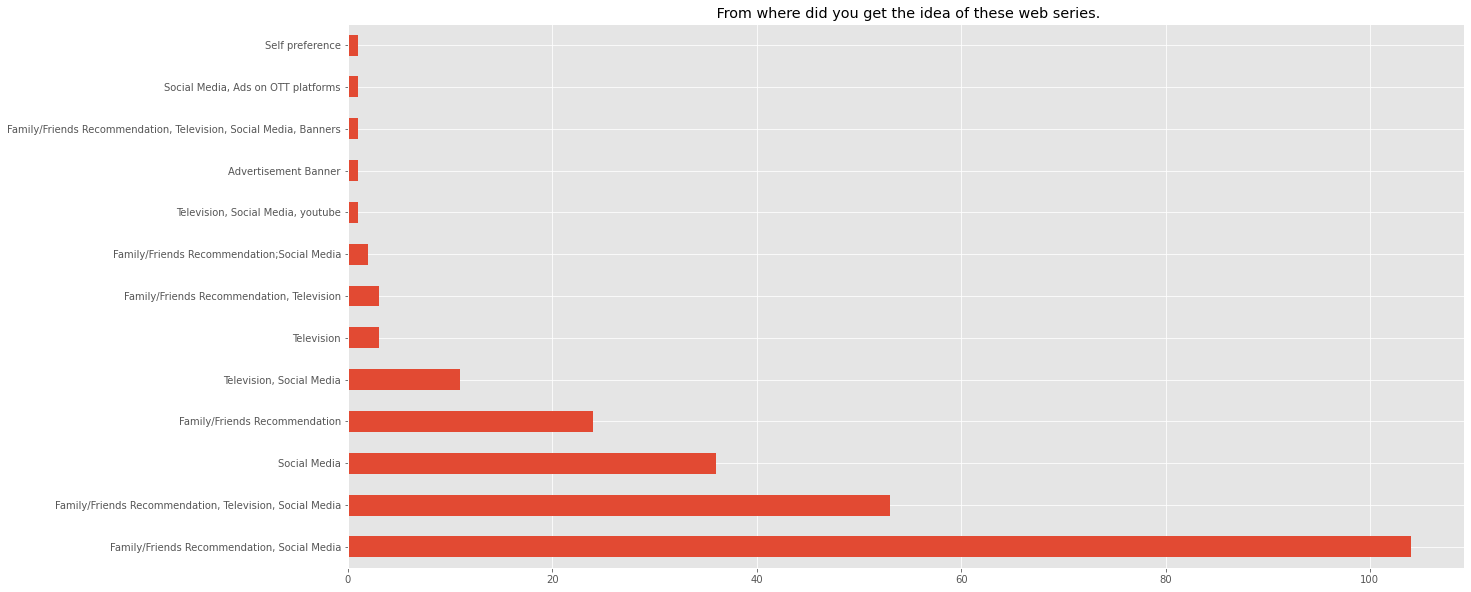

In [164]:
data['advertisement'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title(" From where did you get the idea of these web series.")
plt.show()

In [165]:
def trans_conn(x):
    if x =='Excellent':
        return 1
    if x =='Good':
        return 2
    if x =='Fair':
        return 3
    if x =='Improvement Needed':
        return 0

In [166]:
data['Overall Rating']=data['Overall Rating'].apply(trans_conn)

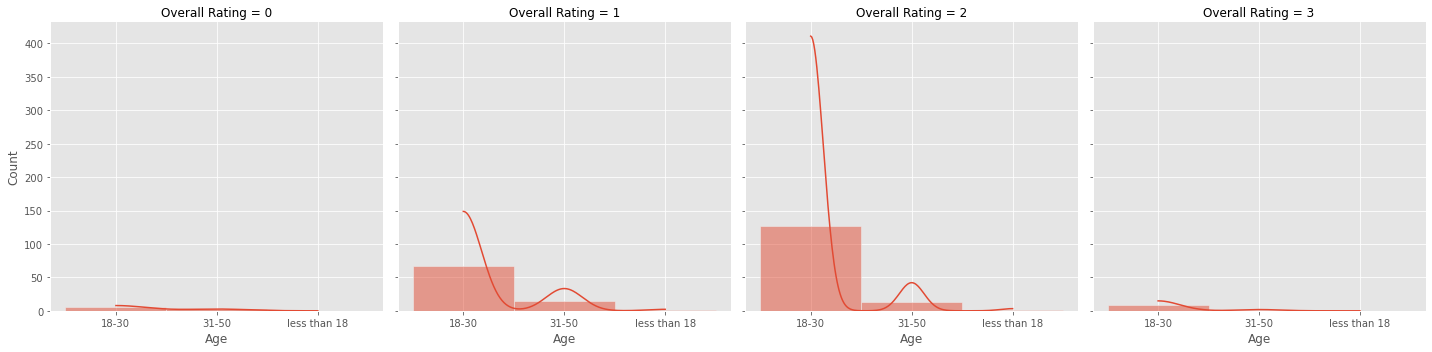

In [167]:
sns.displot(data=data,x="Age",col="Overall Rating",kde=True)

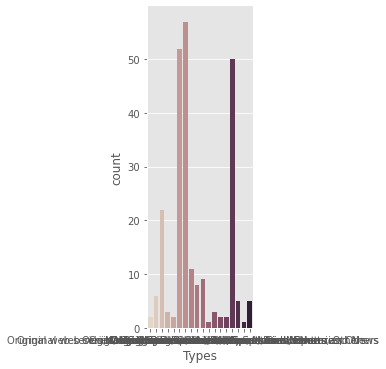

In [168]:
sns.catplot(data=data,kind="count",x="Types", palette="ch:.21")

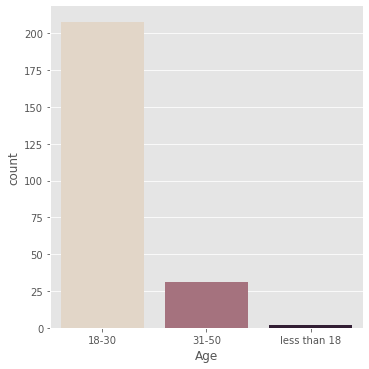

In [169]:
sns.catplot(data=data,kind="count",x="Age", palette="ch:.21")

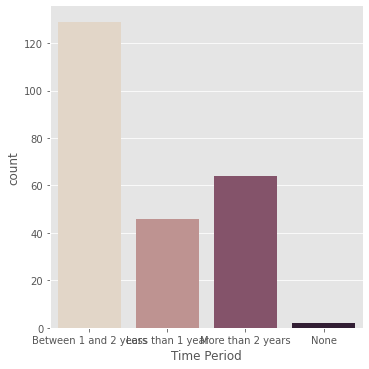

In [170]:
sns.catplot(data=data,kind="count",x="Time Period", palette="ch:.21")

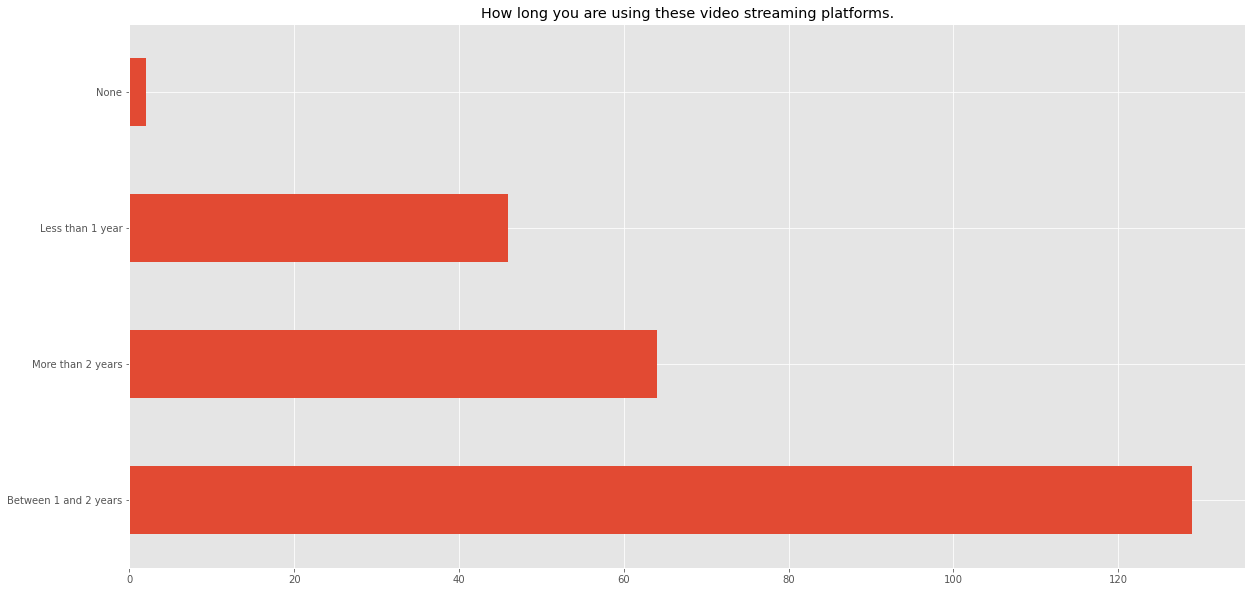

In [171]:
data['Time Period'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title("How long you are using these video streaming platforms.")
plt.show()

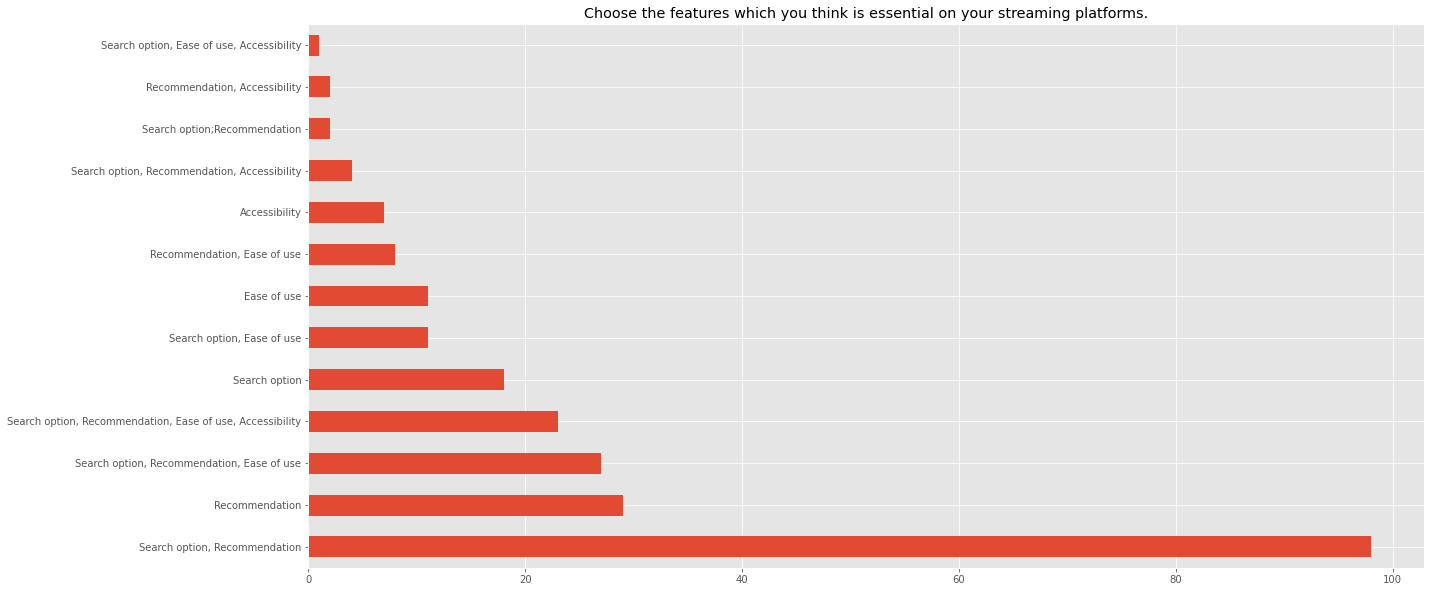

In [172]:
data['Features'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title("Choose the features which you think is essential on your streaming platforms.")
plt.show()

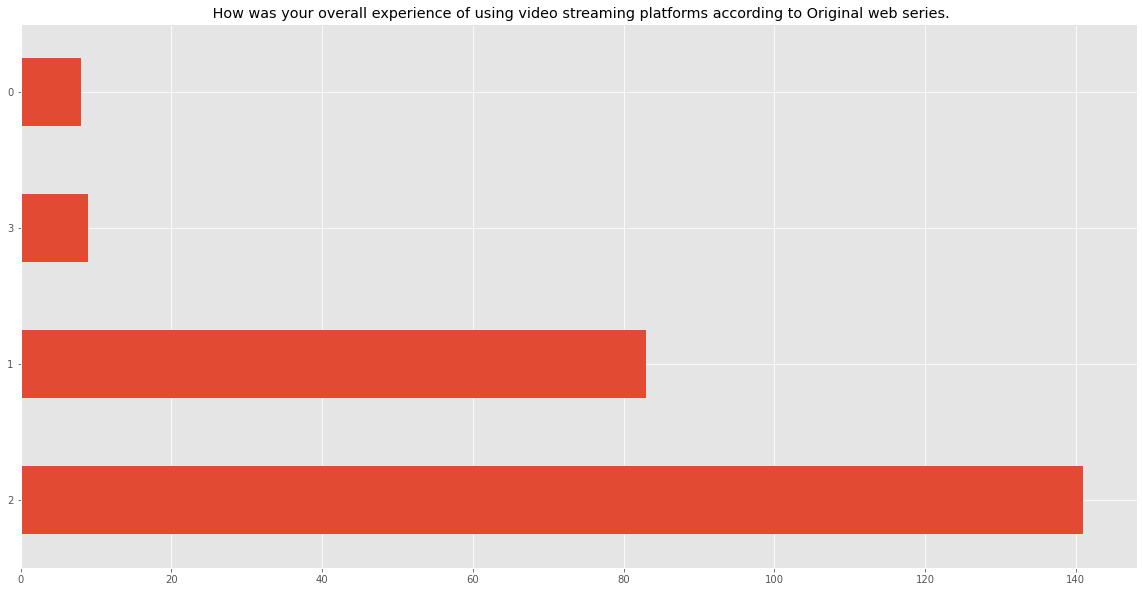

In [173]:
data['Overall Rating'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title(" How was your overall experience of using video streaming platforms according to Original web series.")
plt.show()

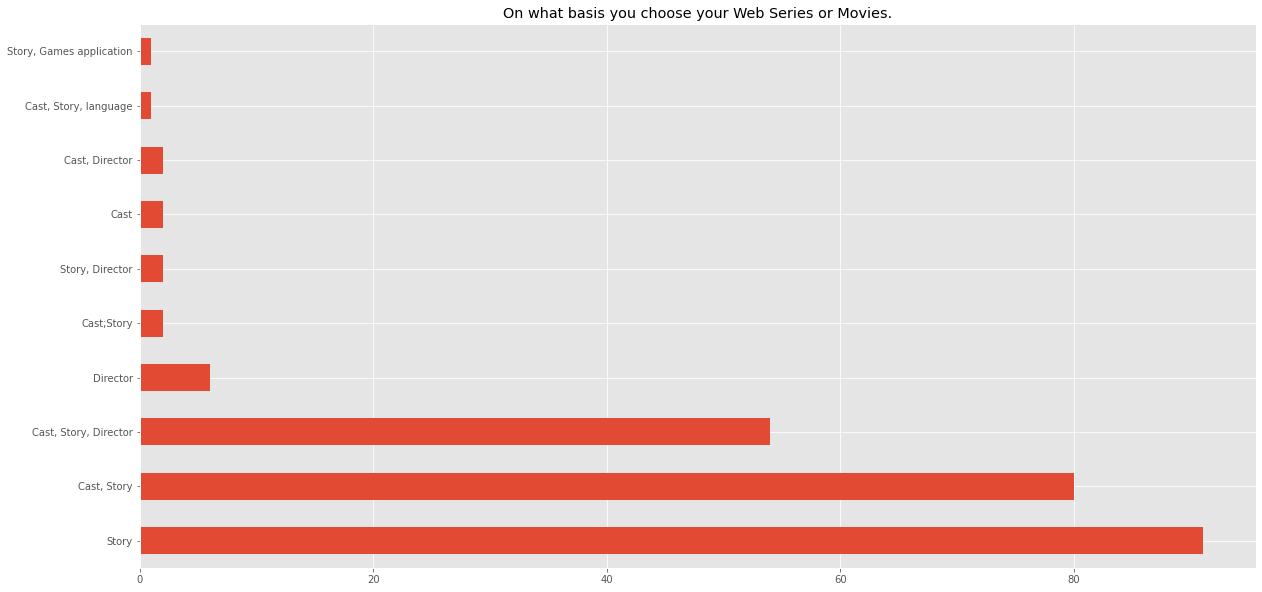

In [174]:
data['Selection'].value_counts().plot(kind='barh',figsize=(20,10))
plt.title("On what basis you choose your Web Series or Movies.")
plt.show()

In [175]:
data.columns

Index(['Timestamp', 'Video Streaming Platform(Y/N)', 'Frequency of VSPA',
       'Currently Used VSPA', 'Types', 'Genres', 'Netflix Original Series',
       'Prime Original Series', 'Hotstar Original Series',
       'Hulu Original Series', 'Age', 'advertisement', 'Selection',
       'Time Period', 'Features', 'Overall Rating', 'Suggestion'],
      dtype='object')

In [176]:
df = pd.DataFrame()

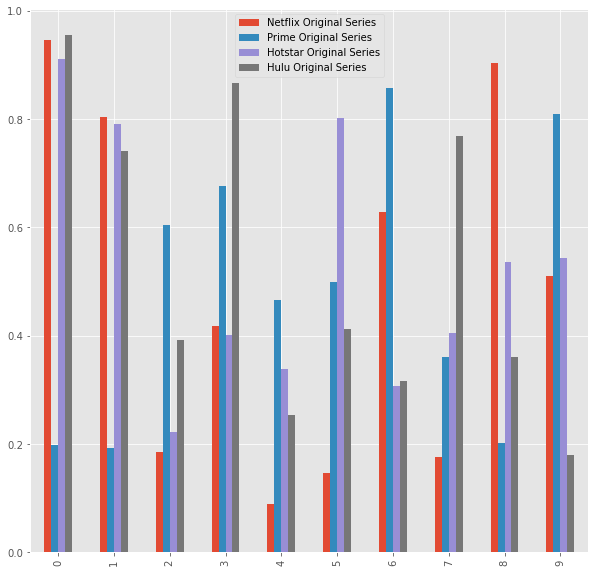

In [177]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["Netflix Original Series", "Prime Original Series", "Hotstar Original Series", "Hulu Original Series"])
df2.plot.bar(figsize=(10,10));

In [178]:
plt.figure();

<Figure size 1440x720 with 0 Axes>

In [179]:
df=data[:5]
df.plot( 'Overall Experiance',["Netflix Original Series", "Prime Original Series", "Hotstar Original Series", "Hulu Original Series"])

KeyError: 'Overall Experiance'

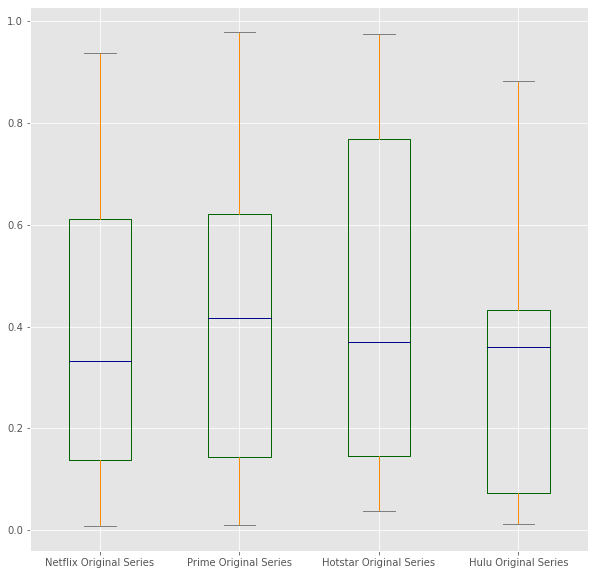

In [180]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["Netflix Original Series", "Prime Original Series", "Hotstar Original Series", "Hulu Original Series"])
color = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
        "medians": "DarkBlue",
        "caps": "Gray",
   }

df.plot.box(figsize=(10,10),color=color);

In [181]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Types', 'Genres'])

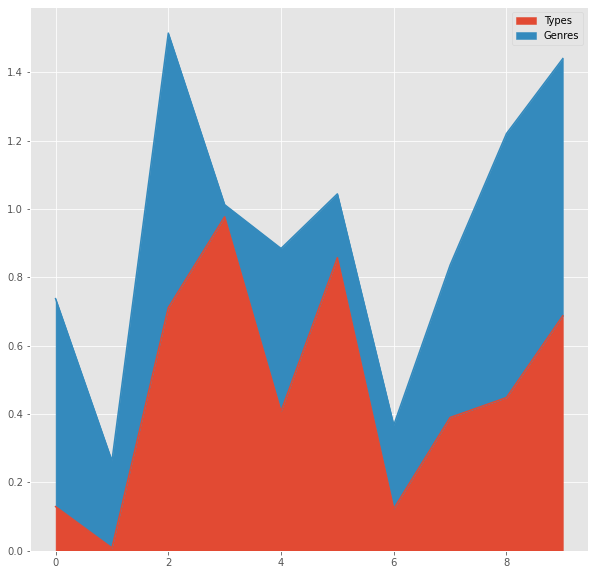

In [182]:
df.plot.area(figsize=(10,10));

In [183]:
 df = pd.DataFrame(np.random.randn(250, 2), columns=['Age', 'advertisement'])

In [184]:
df["advertisement"] = df["advertisement"] + np.arange(250)


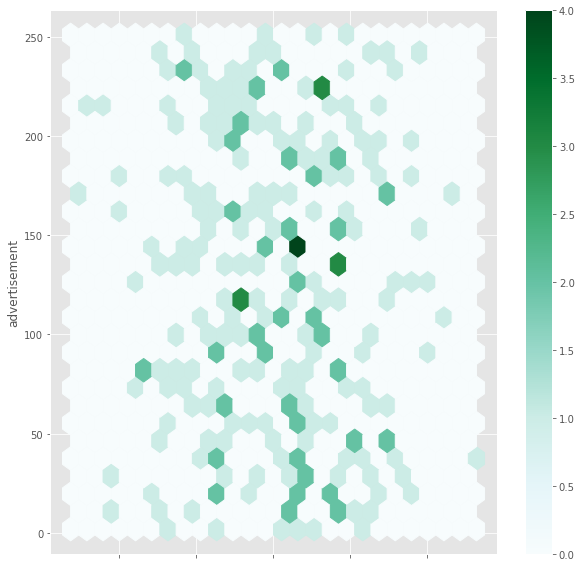

In [185]:
df.plot.hexbin(x="Age", y="advertisement", gridsize=25,figsize=(10,10));

In [186]:
df = pd.read_csv('Video Streaming Platform Analysis.csv', skiprows = range(20))
years = list(map(str, range(1980,2013)))

In [187]:
fig2 = plt.plot(df.loc['Video Streaming Platform(Y/N)',years], label = 'Netflix')
plt.plot(df.loc['Prime Original Series',years], label = 'China')
plt.plot(df.loc['Hotstar Original Series',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Frequency of VSPA from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')

plt.show()

KeyError: 'Video Streaming Platform(Y/N)'

In [ ]:
data.columns

In [ ]:
year_int10 = list(map(str, (1980,1990,2000,2010, 2013)))
data_group = pd.DataFrame(data.loc[['Netflix Original Series','Prime Original Series','Hotstar Original Series','Hulu Original Series'],year_int10].T)

df_group.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12)
plt.savefig('bar_grouped.png')

plt.show()

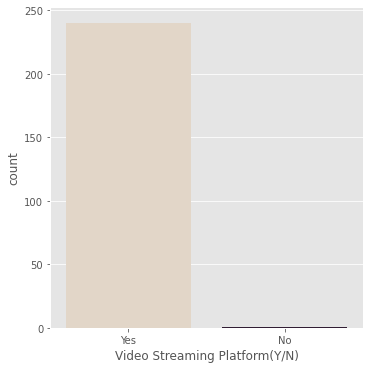

In [188]:
sns.catplot(data=data,kind="count",x="Video Streaming Platform(Y/N)", palette="ch:.21")

In [189]:
data.columns

Index(['Timestamp', 'Video Streaming Platform(Y/N)', 'Frequency of VSPA',
       'Currently Used VSPA', 'Types', 'Genres', 'Netflix Original Series',
       'Prime Original Series', 'Hotstar Original Series',
       'Hulu Original Series', 'Age', 'advertisement', 'Selection',
       'Time Period', 'Features', 'Overall Rating', 'Suggestion'],
      dtype='object')

In [190]:
data

,Timestamp,Video Streaming Platform(Y/N),Frequency of VSPA,Currently Used VSPA,Types,Genres,Netflix Original Series,Prime Original Series,Hotstar Original Series,Hulu Original Series,Age,advertisement,Selection,Time Period,Features,Overall Rating,Suggestion
0,3/1/2021 16:41,Yes,Once or twice in a week,"Netflix, Prime, Hotstar","Original web series, Others","Comedy, Others","Money Heist, Standup Comedy","Tandav, Standup Comedy , The Family man , Pa...",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Recommendation, Ease of use",2,"Yes, faster next season."
1,3/1/2021 19:44,Yes,Monthly,"Netflix, Prime",Movies,"Action, Drama, Comedy",Money Heist,"Standup Comedy , The Family man , Panchayat.",None of the above,The Ultimate Playlist of Noise,18-30,"Family/Friends Recommendation, Social Media","Story, Director",Less than 1 year,"Search option, Recommendation",1,No
2,3/1/2021 20:44,Yes,Daily,"Netflix, Prime, Hotstar, Hulu","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy, Horror","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya","Helstorm, Monsterland, Woke, The Ultimate Play...",18-30,"Family/Friends Recommendation, Television, Soc...",Story,Between 1 and 2 years,"Search option, Recommendation",1,Nothing
3,3/1/2021 20:45,Yes,Daily,Hulu,"Movies, Sports and News",Action,"13 Reasons Why, The Witcher","Made in heaven, Tandav, Breath into the shadow","Hostages, Arya","Monsterland, None of the above",18-30,"Television, Social Media","Cast, Director",More than 2 years,Ease of use,1,Nothing
4,3/2/2021 21:06,Yes,Daily,"Netflix, Prime, Hotstar, Zee5","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya,...",None of the above,18-30,"Family/Friends Recommendation, Television, Soc...","Cast, Story",More than 2 years,"Recommendation, Ease of use",1,Need more web series like Money Heist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4/12/2021 23:13,Yes,Daily,Prime,"Original web series, Documentaries","Drama, Comedy",None of the above,"Made in heaven, Tandav",None of the above,None of the above,31-50,"Social Media, Ads on OTT platforms","Cast, Story, Director",Between 1 and 2 years,"Search option, Recommendation",1,No need
237,4/12/2021 23:15,Yes,Daily,"Netflix, Prime","Original web series, Movies, Documentaries","Action, Drama, Comedy, Horror, Others","13 Reasons Why, The Witcher, Money Heist","Mirzapur, Tandav",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Search option, Recommendation",2,yes need to decrease the membership amount
238,2021/04/28 8:55:16 AM GMT+5:30,Yes,Daily,Prime,Original web series,"Action, Comedy",None of the above,"Mirzapur, Tandav",None of the above,None of the above,18-30,Social Media,Cast,Between 1 and 2 years,Search option;Recommendation,1,No
239,2021/04/28 2:40:46 PM GMT+5:30,Yes,Once or twice in a week,Prime,Original web series,"Action, Drama, Comedy",None of the above,"Mirzapur, Made in heaven",None of the above,None of the above,18-30,Family/Friends Recommendation;Social Media,Cast;Story,Less than 1 year,Search option;Recommendation,2,No need


In [191]:
Netflix=data.groupby('Netflix Original Series').Types.count()

In [195]:
Netflix

Netflix Original Series
13 Reasons Why                                                                                    9
13 Reasons Why, Cursed                                                                            1
13 Reasons Why, Money Heist                                                                       1
13 Reasons Why, The Witcher                                                                       7
13 Reasons Why, The Witcher, Money Heist                                                          7
Guilty                                                                                            1
Money Heist                                                                                       6
Money Heist                                                                                       1
Money Heist, Standup Comedy                                                                       1
None of the above                                                           

In [193]:
Netflix.count()

31

Predicting the effect of the Original Series on platforms.

In [196]:
data[(data["Overall Rating"]>=1)&(data["Prime Original Series"]=="Mirzapur")].count()

Timestamp                        45
Video Streaming Platform(Y/N)    45
Frequency of VSPA                45
Currently Used VSPA              45
Types                            45
Genres                           45
Netflix Original Series          45
Prime Original Series            45
Hotstar Original Series          45
Hulu Original Series             45
Age                              45
advertisement                    45
Selection                        45
Time Period                      45
Features                         45
Overall Rating                   45
Suggestion                       45
dtype: int64

In [210]:
def trans_con(x):
    if x =='Daily':
        return 1
    if x =='Monthly':
        return 2
    if x =='Once or twice in a week':
        return 3
    if x =='None of the Above':
        return 0

In [211]:
data['Frequency of VSPA']=data['Frequency of VSPA'].apply(trans_con)

In [212]:
data

,Timestamp,Video Streaming Platform(Y/N),Frequency of VSPA,Currently Used VSPA,Types,Genres,Netflix Original Series,Prime Original Series,Hotstar Original Series,Hulu Original Series,Age,advertisement,Selection,Time Period,Features,Overall Rating,Suggestion
0,3/1/2021 16:41,Yes,3,"Netflix, Prime, Hotstar","Original web series, Others","Comedy, Others","Money Heist, Standup Comedy","Tandav, Standup Comedy , The Family man , Pa...",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Recommendation, Ease of use",2,"Yes, faster next season."
1,3/1/2021 19:44,Yes,2,"Netflix, Prime",Movies,"Action, Drama, Comedy",Money Heist,"Standup Comedy , The Family man , Panchayat.",None of the above,The Ultimate Playlist of Noise,18-30,"Family/Friends Recommendation, Social Media","Story, Director",Less than 1 year,"Search option, Recommendation",1,No
2,3/1/2021 20:44,Yes,1,"Netflix, Prime, Hotstar, Hulu","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy, Horror","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya","Helstorm, Monsterland, Woke, The Ultimate Play...",18-30,"Family/Friends Recommendation, Television, Soc...",Story,Between 1 and 2 years,"Search option, Recommendation",1,Nothing
3,3/1/2021 20:45,Yes,1,Hulu,"Movies, Sports and News",Action,"13 Reasons Why, The Witcher","Made in heaven, Tandav, Breath into the shadow","Hostages, Arya","Monsterland, None of the above",18-30,"Television, Social Media","Cast, Director",More than 2 years,Ease of use,1,Nothing
4,3/2/2021 21:06,Yes,1,"Netflix, Prime, Hotstar, Zee5","Original web series, Movies, Documentaries, Sp...","Action, Drama, Comedy","Sacred Games, 13 Reasons Why, The Witcher, Mon...","Mirzapur, Made in heaven, Tandav, Breath into ...","Special OPS, Hostages, Criminal Justice, Arya,...",None of the above,18-30,"Family/Friends Recommendation, Television, Soc...","Cast, Story",More than 2 years,"Recommendation, Ease of use",1,Need more web series like Money Heist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4/12/2021 23:13,Yes,1,Prime,"Original web series, Documentaries","Drama, Comedy",None of the above,"Made in heaven, Tandav",None of the above,None of the above,31-50,"Social Media, Ads on OTT platforms","Cast, Story, Director",Between 1 and 2 years,"Search option, Recommendation",1,No need
237,4/12/2021 23:15,Yes,1,"Netflix, Prime","Original web series, Movies, Documentaries","Action, Drama, Comedy, Horror, Others","13 Reasons Why, The Witcher, Money Heist","Mirzapur, Tandav",None of the above,None of the above,18-30,"Family/Friends Recommendation, Social Media","Cast, Story",Between 1 and 2 years,"Search option, Recommendation",2,yes need to decrease the membership amount
238,2021/04/28 8:55:16 AM GMT+5:30,Yes,1,Prime,Original web series,"Action, Comedy",None of the above,"Mirzapur, Tandav",None of the above,None of the above,18-30,Social Media,Cast,Between 1 and 2 years,Search option;Recommendation,1,No
239,2021/04/28 2:40:46 PM GMT+5:30,Yes,3,Prime,Original web series,"Action, Drama, Comedy",None of the above,"Mirzapur, Made in heaven",None of the above,None of the above,18-30,Family/Friends Recommendation;Social Media,Cast;Story,Less than 1 year,Search option;Recommendation,2,No need


In [213]:
data["Overall Rating"]=data["Overall Rating"].astype('int')

In [214]:
data["Overall Rating"].dtypes

dtype('int32')

In [215]:
data["Frequency of VSPA"]=data["Frequency of VSPA"].astype('int')

In [216]:
data["Overall Rating"].dtypes

dtype('int32')

In [203]:
Ages=data.groupby('Age').Genres.count()

In [199]:
Ages

Age
18-30           208
31-50            31
less than 18      2
Name: Genres, dtype: int64

In [200]:
Gen=data.Genres.unique()

In [201]:
Gen

array(['Comedy, Others', 'Action, Drama, Comedy',
       'Action, Drama, Comedy, Horror', 'Action',
       'Action, Drama, Comedy, Horror, Others',
       'Action, Drama, Comedy, Others', 'Comedy', 'Drama, Comedy, Horror',
       'Action,Drama', 'Action, Comedy, Horror', 'Action, Horror',
       'Comedy, Horror', 'Drama, Horror', 'Action, Others',
       'Drama, Comedy', 'Horror', 'Action, Drama, Horror', 'Others',
       'Drama', 'Action, Horror, Others', 'Action, Comedy',
       'Drama, Horror, Others', 'Comedy, Horror, Others', 'Action, Drama',
       'Drama, Others', 'Drama, Comedy, Others'], dtype=object)